# Student Performance Indicator Analysis and Prediction

## 1. Problem Statement
- Objective: Predict student performance based on various features
- Target variable: Student performance indicators
- Type of problem: Supervised Learning (Classification/Regression)

## 2. Data Collection
- Data source description
- Features overview
- Data loading and initial inspection

## 3. Exploratory Data Analysis (EDA)
- Univariate analysis
- Bivariate analysis
- Correlation analysis
- Missing value analysis
- Outlier detection
- Statistical summary
- Visualization of key insights

## 4. Data Preprocessing & Transformation
- Missing value treatment
- Feature encoding
- Feature scaling/normalization
- Feature selection/engineering
- Data splitting (train-test)

## 5. Model Training
- Selection of algorithms
- Baseline model creation
- Hyperparameter tuning
- Cross-validation

## 6. Model Evaluation
- Performance metrics analysis
- Model comparison
- Validation results
- Error analysis

## 7. Model Selection
- Best model identification
- Performance comparison
- Trade-offs analysis

## 8. Prediction Pipeline
- Final model implementation
- Prediction workflow
- Model deployment considerations


In [1]:
## importing the dependencies
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [2]:
## importing the dataset
df = pd.read_csv('/Users/arihantsingla/Documents/machine_learning_project/notebook/stud.csv')
df.head()



,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


in[4]: # Feature Description

## Categorical Features
1. **gender**
   - Type: Nominal
   - Description: Student's gender (female/male)

2. **race_ethnicity**
   - Type: Nominal
   - Description: Student's racial/ethnic group (A-E)

3. **parental_level_of_education**
   - Type: Ordinal
   - Description: Highest education level of parent(s)

4. **lunch**
   - Type: Nominal
   - Description: Type of lunch received (standard/free/reduced)

## Numerical Features (Test Scores)
1. **math_score**
   - Type: Continuous
   - Description: Score achieved in math test (0-100)

2. **reading_score**
   - Type: Continuous
   - Description: Score achieved in reading test (0-100)

3. **writing_score**
   - Type: Continuous
   - Description: Score achieved in writing test (0-100)

df.shape()
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape


In [3]:
print("Dataset Shape:", df.shape)
print("\n")
print("Dataset Info:")
print(df.info())
print("\n")
print("Null Values Count:")
print(df.isnull().sum())
print("\n")
print("Duplicate Rows Count:", df.duplicated().sum())
# df.drop_duplicates(inplace=True)  # Commented out since it's already done in previous cell

Dataset Shape: (1000, 8)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


Null Values Count:
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_s

## Initial Data Analysis Summary

- **Dataset Dimensions**: The dataset contains student performance records with multiple features
- **Features**: 
  - 5 Categorical features (gender, race/ethnicity, parental education, lunch type, test preparation)
  - 3 Numerical features (math, reading, and writing scores)
- **Data Quality**:
  - No missing values detected
  - No duplicate entries (duplicates were removed)
  - All features have appropriate data types
- **Next Steps**:
  - Perform detailed statistical analysis
  - Visualize feature distributions
  - Analyze correlations between variables
  - Identify potential patterns in test scores

In [4]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [5]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
numerical_features = [d for d in df.columns if df[d].dtype != 'O']
categorical_features = [d for d in df.columns if df[d].dtype == 'O']

print("we have {} numerical features".format(len(numerical_features)))
print("we have {} categorical features".format(len(categorical_features)))

print(numerical_features)
print(categorical_features)



we have 3 numerical features
we have 5 categorical features
['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [7]:
total_score = df['math_score'] + df['reading_score'] + df['writing_score']
df['total_score'] = total_score
# df.drop(columns=['math_score', 'reading_score', 'writing_score'], inplace=True)
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [10]:
## students who scored more than average score
print(len(df[df['average_score'] > df['average_score'].mean()]))
## students who scored less than average score
print(len(df[df['average_score'] < df['average_score'].mean()]))
## students who scored more than average score in math
print(len(df[df['math_score'] > df['math_score'].mean()]))


526
474
493


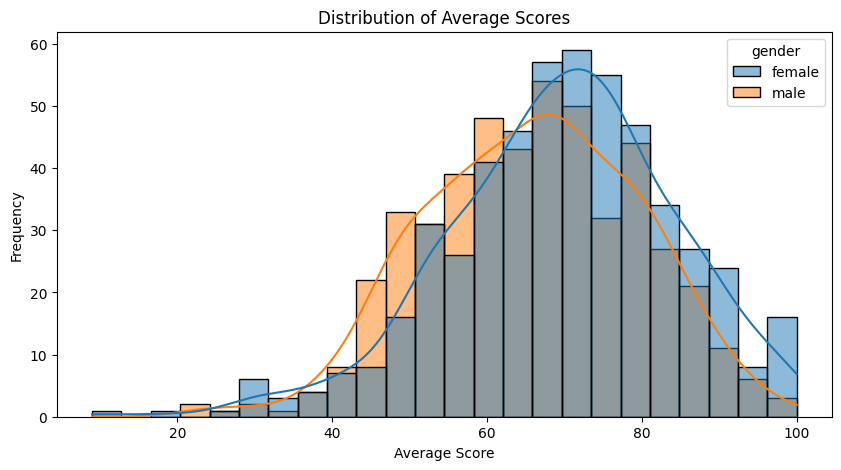

In [18]:
## visualizing the average score
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='average_score', edgecolor='black',hue='gender',kde=True)
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()

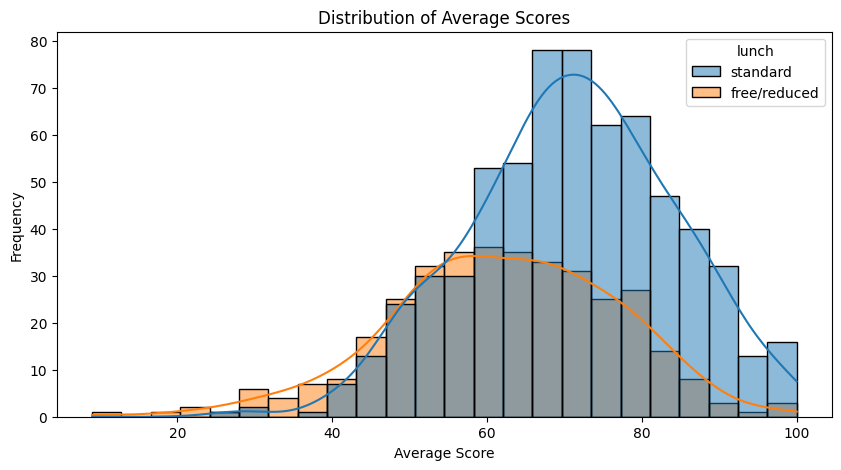

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='average_score', edgecolor='black',hue='lunch',kde=True)
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()


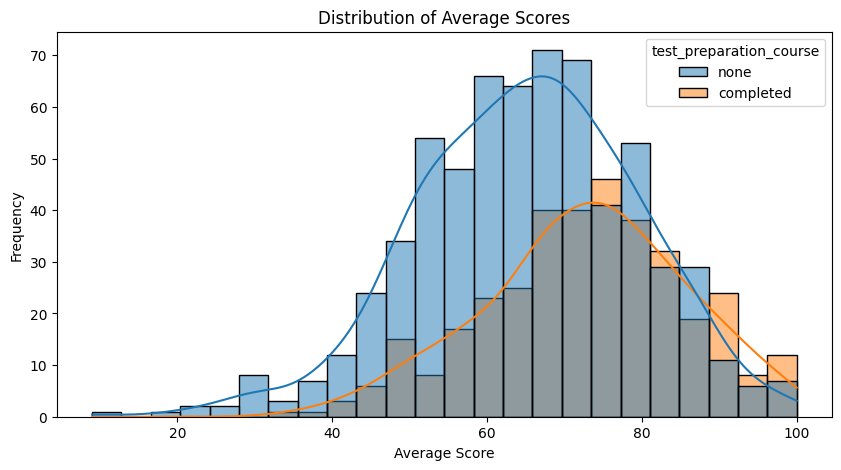

test_preparation_course
completed    72.669460
none         65.038941
Name: average_score, dtype: float64

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='average_score', edgecolor='black',hue='test_preparation_course',kde=True)
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()

## shows that the mean of students who completed the test preparation course is higher than the mean of students who did not complete the test preparation course
df.groupby('test_preparation_course')['average_score'].mean()

## shows that the mean of students who have completed the test preparation course is higher than the mean of students who have not completed the test preparation course
df.groupby('test_preparation_course')['average_score'].mean()


